In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns


In [289]:
df = pd.read_csv('/content/drive/MyDrive/credit_scoring_dataset.csv')
df

,customer_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
1,49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
2,25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
3,a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
4,53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30
32577,ece9693f-16c5-416b-bfa7-34eae7bdc4b3,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19
32578,1fcb6014-9aad-45be-ac2a-490cfc55c0e4,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28
32579,a3e63186-afb3-48cd-a0ca-dcb22825107d,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,26


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ MB


In [291]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218195,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413027,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,30.000000


In [292]:
df['loan_status'].value_counts()

0    25472
1     7109
Name: loan_status, dtype: int64

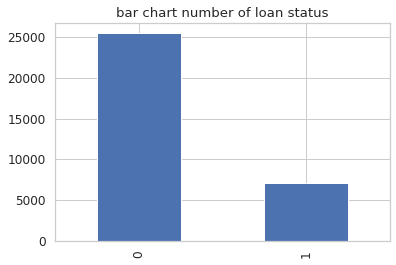

In [293]:
df['loan_status'].value_counts().plot(kind='bar', title='bar chart number of loan status', x=['Good', 'Bad'])

In [294]:
#binning data
df_age = df[['loan_status','person_age']]
df_age['bin_person_age'] = pd.qcut(df_age['person_age'], q=5, duplicates='drop', precision=0)
df_age = df_age.groupby(['bin_person_age']).agg({'loan_status':['count', 'sum']})
df_age.columns = df_age.columns.map('_'.join)
df_age

<ipython-input-294-80a4073e5aa0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_person_age'] = pd.qcut(df_age['person_age'], q=5, duplicates='drop', precision=0)


,loan_status_count,loan_status_sum
bin_person_age,,
"(19.0, 23.0]",8766,2092
"(23.0, 25.0]",6586,1444
"(25.0, 27.0]",4615,961
"(27.0, 32.0]",6963,1445
"(32.0, 144.0]",5651,1167


In [295]:
#feature engineering
df_age['dist'] = df_age['loan_status_count']/df_age['loan_status_count'].sum()
df_age['bad_rate'] = df_age['loan_status_sum']/df_age['loan_status_count']

df_age = df_age.reset_index()



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


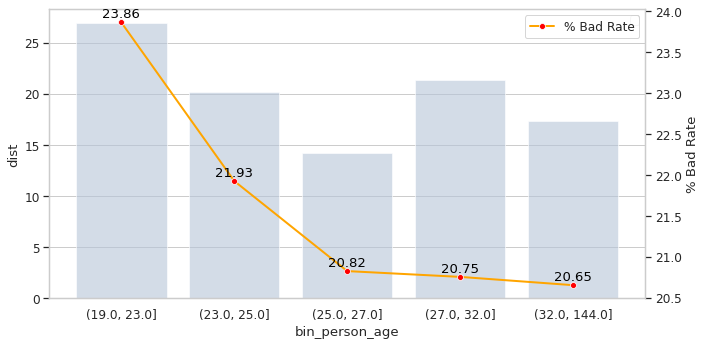

In [296]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, figsize=(10,5))




### Second figure is bar plot + line chart ###

### y axis (left) is bar plot ###
sns.barplot(df_age['bin_person_age'], df_age['dist']*100, data = df_age, color='lightsteelblue', alpha=.6,
            ax = ax)

### y axis (right) is line chart ###
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_age, x=df_age.index, y=df_age['bad_rate']*100\
                   , marker='o',\
                  markerfacecolor='red', markersize=6, color='orange', 
                  linewidth=2, label='% Bad Rate')

for x,y in zip(df_age.index, df_age['bad_rate']*100):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

ax.legend()
ax2.grid(False)
ax2.set_ylabel('% Bad Rate')
plt.tight_layout() 
plt.show();

In [297]:
df_age

,bin_person_age,loan_status_count,loan_status_sum,dist,bad_rate
0,"(19.0, 23.0]",8766,2092,0.269053,0.238649
1,"(23.0, 25.0]",6586,1444,0.202142,0.219253
2,"(25.0, 27.0]",4615,961,0.141647,0.208234
3,"(27.0, 32.0]",6963,1445,0.213714,0.207525
4,"(32.0, 144.0]",5651,1167,0.173445,0.206512


[]

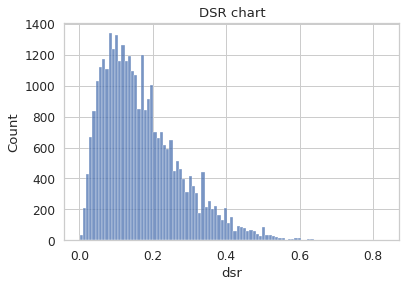

In [298]:
#DSR    หนี้/รายได้
df['dsr'] = df['loan_amnt']/df['person_income']

plt.title('DSR chart')
sns.histplot(df['dsr'])
plt.plot()

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
 12  dsr                         32581 non-null  float64
dtypes: float64(3), int64(5), object

In [300]:
#check missing value
df.isnull().sum()

customer_id                      0
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dsr                              0
dtype: int64

In [301]:
df[['person_emp_length', 'loan_int_rate']].describe()

,person_emp_length,loan_int_rate
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


[]

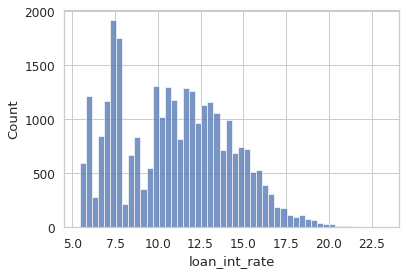

In [302]:
sns.histplot(df['loan_int_rate'])
plt.plot()

[]

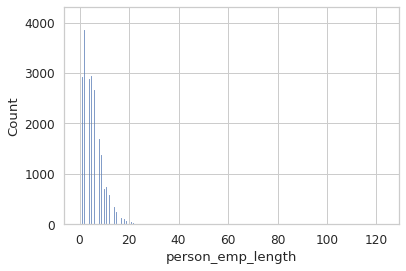

In [303]:
sns.histplot(df['person_emp_length'])
plt.plot()

In [304]:
#fill missing value with median

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [305]:
#check after filling
df.isnull().sum()

customer_id                   0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dsr                           0
dtype: int64

In [306]:
df_ = df.iloc[:,1:]
df_

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3,0.593220
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2,0.104167
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3,0.572917
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2,0.534351
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4,0.643382
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30,0.109434
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19,0.146875
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28,0.460526
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,26,0.100000


In [307]:
for col in df_.columns:
  print(df[col].dtype)

int64
int64
object
float64
object
object
int64
float64
int64
object
int64
float64


In [308]:
#binning data
def binning_numeric(df):
    for i in df._get_numeric_data().columns:
        if i == 'loan_status':
            continue
        else:
            df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')

    return df_

In [309]:
df_bin = binning_numeric(df_)
df_bin

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
0,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(1.0, 3.0]","(0.3, 0.8]"
1,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,N,"(1.0, 3.0]","(0.08, 0.1]"
2,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
3,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
4,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(3.0, 4.0]","(0.3, 0.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,"(32.0, 144.0]","(49000.0, 63000.0]",MORTGAGE,"(-1.0, 1.0]",PERSONAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",0,N,"(9.0, 30.0]","(0.08, 0.1]"
32577,"(32.0, 144.0]","(86000.0, 6000000.0]",MORTGAGE,"(3.0, 5.0]",PERSONAL,A,"(14500.0, 35000.0]","(5.300000000000001, 7.7]",0,N,"(9.0, 30.0]","(0.1, 0.2]"
32578,"(32.0, 144.0]","(63000.0, 86000.0]",RENT,"(1.0, 3.0]",HOMEIMPROVEMENT,B,"(14500.0, 35000.0]","(10.6, 11.5]",1,N,"(9.0, 30.0]","(0.3, 0.8]"
32579,"(32.0, 144.0]","(86000.0, 6000000.0]",MORTGAGE,"(3.0, 5.0]",PERSONAL,B,"(14500.0, 35000.0]","(10.6, 11.5]",0,N,"(9.0, 30.0]","(0.08, 0.1]"


In [310]:
df_woe = df_bin.copy()

In [311]:
#create woe and iv
def woe_iv(df_woe):
    iv_dict = {}
    final_iv = {}

    for i in df_woe.select_dtypes(object).columns:

        ### Calculate WOE and IV ###
        d = pd.DataFrame(df_woe.groupby([i]).size(), columns=['total'])

        d['count_bad'] = df_woe.groupby([i])['loan_status'].sum()
        d['count_good'] = d['total']-d['count_bad']

        d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
        d['dist_good'] = d['count_good']/d['count_good'].sum()

        d['woe'] = np.log(d.dist_bad/d.dist_good) # woe
        d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good) # iv

        d = d.replace([np.inf, -np.inf], 0)
        d = d.reset_index()

        # --------------------- #

        ### Append dataframe in dictionary ###
        if i not in final_iv:
            final_iv[i] = []
        final_iv[i].append(d)

        ### Map WOE value ###
        woe_dict = d.groupby([i])['woe'].mean().to_dict()
        df_woe['woe_'+i] = df_woe[i].map(woe_dict)

        ### Calculate final IV of each feature and append in dictionary
        if i not in iv_dict:
            iv_dict[i] = []
        iv_dict[i].append(d['iv'].sum())

    ### Generate IV dataframe
    iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
    iv_df.index.name = 'Feature'

    return final_iv, iv_df, df_woe

In [312]:
final_iv, iv_df, df_woe = woe_iv(df_woe)

In [313]:
df_woe

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,...,woe_person_income,woe_person_home_ownership,woe_person_emp_length,woe_loan_intent,woe_loan_grade,woe_loan_amnt,woe_loan_int_rate,woe_cb_person_default_on_file,woe_cb_person_cred_hist_length,woe_dsr
0,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,...,-0.226904,0.502614,-0.323157,-0.115973,1.642076,0.472619,1.209506,0.778461,0.064186,1.368686
1,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,N,...,1.005497,-1.240559,-0.022117,-0.294121,-0.360917,-0.051501,-0.215255,-0.213465,0.064186,-0.663736
2,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,N,...,1.005497,-0.662570,0.323545,0.266357,-0.064818,-0.288606,-0.117564,-0.213465,0.064186,1.368686
3,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,N,...,-0.494039,0.502614,-0.022117,0.266357,-0.064818,0.472619,1.209506,-0.213465,0.064186,1.368686
4,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,...,-0.226904,0.502614,-0.225528,0.266357,-0.064818,0.472619,1.209506,0.778461,0.028656,1.368686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,"(32.0, 144.0]","(49000.0, 63000.0]",MORTGAGE,"(-1.0, 1.0]",PERSONAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",0,N,...,-0.226904,-0.662570,0.323545,-0.115973,-0.064818,-0.288606,-0.117564,-0.213465,-0.064118,-0.663736
32577,"(32.0, 144.0]","(86000.0, 6000000.0]",MORTGAGE,"(3.0, 5.0]",PERSONAL,A,"(14500.0, 35000.0]","(5.300000000000001, 7.7]",0,N,...,-1.021295,-0.662570,-0.022117,-0.115973,-0.925861,0.472619,-1.057980,-0.213465,-0.064118,-0.484197
32578,"(32.0, 144.0]","(63000.0, 86000.0]",RENT,"(1.0, 3.0]",HOMEIMPROVEMENT,B,"(14500.0, 35000.0]","(10.6, 11.5]",1,N,...,-0.494039,0.502614,0.070109,0.235577,-0.360917,0.472619,-0.215255,-0.213465,-0.064118,1.368686
32579,"(32.0, 144.0]","(86000.0, 6000000.0]",MORTGAGE,"(3.0, 5.0]",PERSONAL,B,"(14500.0, 35000.0]","(10.6, 11.5]",0,N,...,-1.021295,-0.662570,-0.022117,-0.115973,-0.360917,0.472619,-0.215255,-0.213465,-0.064118,-0.663736


In [314]:
iv_df.sort_values(by='IV', ascending=False)

,IV
Feature,
loan_grade,0.881539
dsr,0.719621
loan_int_rate,0.590146
person_income,0.462039
person_home_ownership,0.376710
cb_person_default_on_file,0.163922
loan_intent,0.095705
loan_amnt,0.073652
person_emp_length,0.049930


In [315]:
#grade iv
iv_df.loc[iv_df['IV']>0.5, 'Predict_power'] = 'Suspicious'
iv_df.loc[(iv_df['IV']<= 0.5) & (iv_df['IV']>0.3), 'Predict_power'] = 'Strong'
iv_df.loc[(iv_df['IV']<=0.3) & (iv_df['IV']>0.1), 'Predict_power'] = 'Meduim'
iv_df.loc[(iv_df['IV']<=0.1) & (iv_df['IV']>0.02), 'Predict_power'] = 'Weak'
iv_df.loc[iv_df['IV']<=0.02, 'Predict_power'] = 'Not usefull'

In [316]:
iv_df.sort_values(by='IV', ascending=False)

,IV,Predict_power
Feature,,
loan_grade,0.881539,Suspicious
dsr,0.719621,Suspicious
loan_int_rate,0.590146,Suspicious
person_income,0.462039,Strong
person_home_ownership,0.376710,Strong
cb_person_default_on_file,0.163922,Meduim
loan_intent,0.095705,Weak
loan_amnt,0.073652,Weak
person_emp_length,0.049930,Weak


In [354]:
from sklearn.model_selection import train_test_split
X = df_woe.iloc[:,-11:]
y = df_bin['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [359]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

AxesSubplot(0.125,0.125;0.62x0.755)


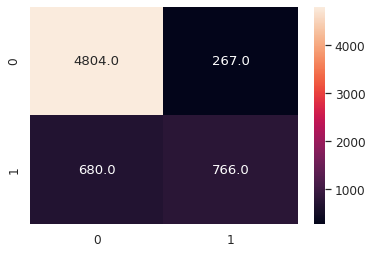

In [360]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True, fmt='.1f'))

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5071
           1       0.74      0.53      0.62      1446

    accuracy                           0.85      6517
   macro avg       0.81      0.74      0.76      6517
weighted avg       0.85      0.85      0.85      6517



In [362]:
print(roc_auc_score(y_test, y_pred))

0.7385424346342789


In [363]:
# use iv >0.1 pass feature to logisticeregression
X_ = df_woe.loc[:,['woe_loan_grade', 'woe_dsr', 'woe_loan_int_rate', 'woe_person_income', 'woe_person_home_ownership', 'woe_cb_person_default_on_file']]
y_ = df_bin['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X_,y_, test_size=0.2, random_state=42)

In [364]:
model_select = LogisticRegression()
model_select.fit(X_train, y_train)


LogisticRegression()

AxesSubplot(0.125,0.125;0.62x0.755)


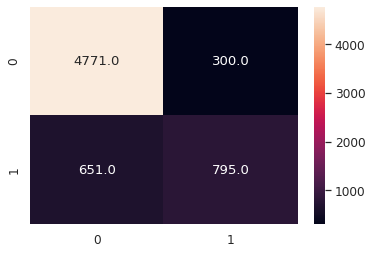

In [365]:
#confusion matrix
y_pred = model_select.predict(X_test, )
print(sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True, fmt='.1f'))

In [366]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5071
           1       0.73      0.55      0.63      1446

    accuracy                           0.85      6517
   macro avg       0.80      0.75      0.77      6517
weighted avg       0.85      0.85      0.85      6517



In [367]:
print(roc_auc_score(y_test, y_pred))

0.7453163010561235
